In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,5)
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [81]:
data = pd.read_csv(r"D:\Data Science Assignment Excelr\Data science assignment Excelr\Timeseries\Timeseries\exchange_rate.csv")

In [83]:
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [85]:
data.shape

(7588, 2)

In [87]:
data1 = data.sort_index()

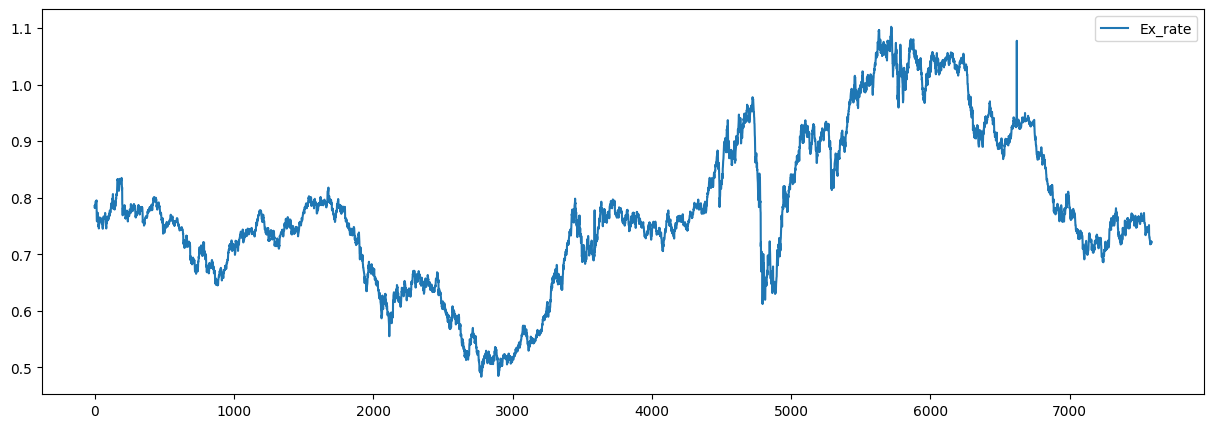

In [89]:
data1.plot();
plt.show()


In [91]:
data.duplicated().sum()

0

In [93]:
data.index.duplicated().sum()

0

In [98]:
adfuller(data['Ex_rate'])[1]

0.4492327353597901

In [100]:
data

,date,Ex_rate,Ex_rate_diff
0,01-01-1990 00:00,0.785500,NaN
1,02-01-1990 00:00,0.781800,-0.003700
2,03-01-1990 00:00,0.786700,0.004900
3,04-01-1990 00:00,0.786000,-0.000700
4,05-01-1990 00:00,0.784900,-0.001100
...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207
7584,07-10-2010 00:00,0.721839,0.003345
7585,08-10-2010 00:00,0.723197,0.001358
7586,09-10-2010 00:00,0.720825,-0.002372


In [101]:
data_diff = data['Ex_rate'].diff().dropna()
adfuller(data_diff)[1]

0.0

In [104]:
data

,date,Ex_rate,Ex_rate_diff
0,01-01-1990 00:00,0.785500,NaN
1,02-01-1990 00:00,0.781800,-0.003700
2,03-01-1990 00:00,0.786700,0.004900
3,04-01-1990 00:00,0.786000,-0.000700
4,05-01-1990 00:00,0.784900,-0.001100
...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207
7584,07-10-2010 00:00,0.721839,0.003345
7585,08-10-2010 00:00,0.723197,0.001358
7586,09-10-2010 00:00,0.720825,-0.002372


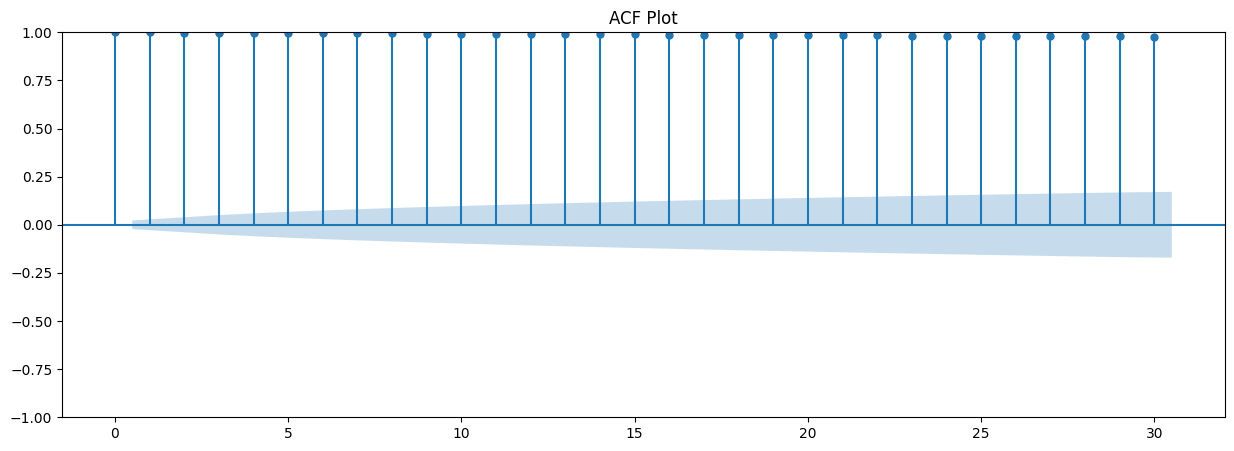

In [139]:
plot_acf(data['Ex_rate'], lags=30)
plt.title('ACF Plot')
plt.show()

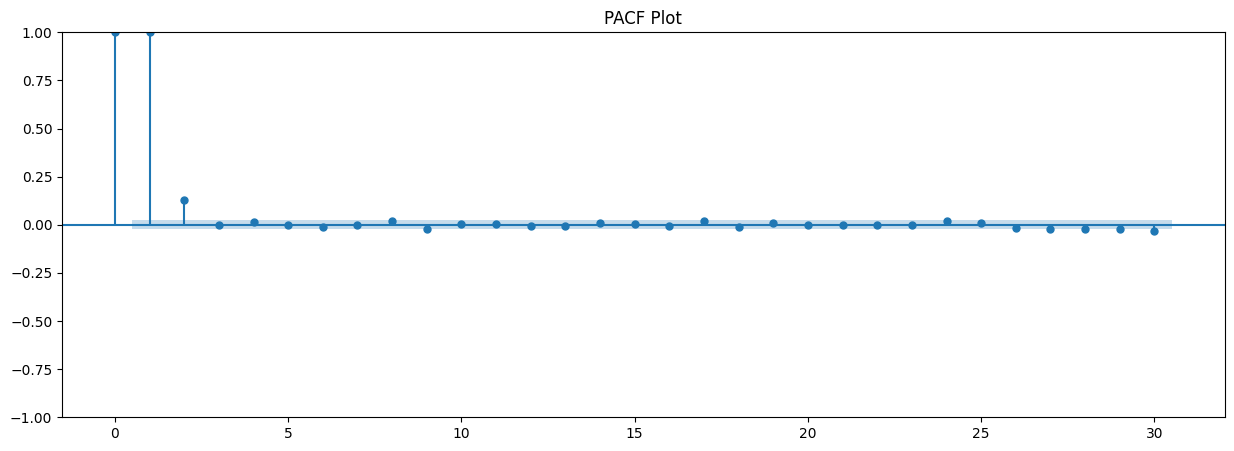

In [141]:
plot_pacf(data['Ex_rate'], lags=30)
plt.title('PACF Plot')
plt.show()

In [111]:
order = auto_arima(data['Ex_rate'])
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [112]:
data.shape

(7588, 3)

In [113]:
train = data.iloc[:-50]
test =  data.iloc[-50:]

In [114]:
train = train.sort_index()
test = test.sort_index()

In [119]:
train.shape,test.shape

((7538, 3), (50, 3))

In [121]:
model = ARIMA(train['Ex_rate'], order = (4,1,5)).fit()

In [122]:
len(test)

50

In [125]:
ypred = model.forecast(steps=len(test))

In [127]:
len(ypred)

50

In [129]:
print(mean_squared_error(test['Ex_rate'], ypred))

0.0004700341387636716


In [131]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.021680270726254124


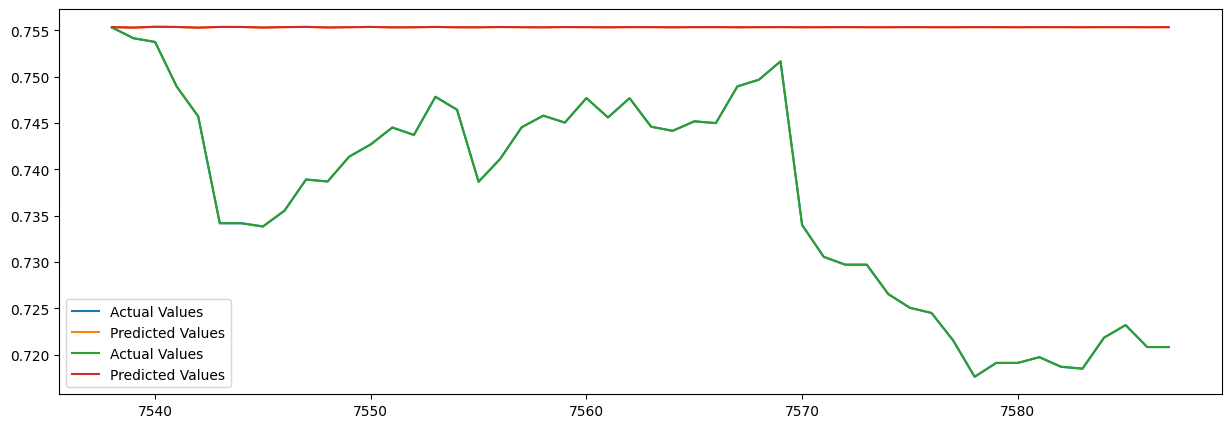

In [145]:
plt.plot(test.index, test['Ex_rate'], label = 'Actual Values')
plt.plot(test.index, ypred, label = 'Predicted Values')
plt.legend()
plt.show()

In [135]:
es = ExponentialSmoothing(train['Ex_rate']).fit()

In [147]:
y_pred_es = es.forecast(steps = 50)

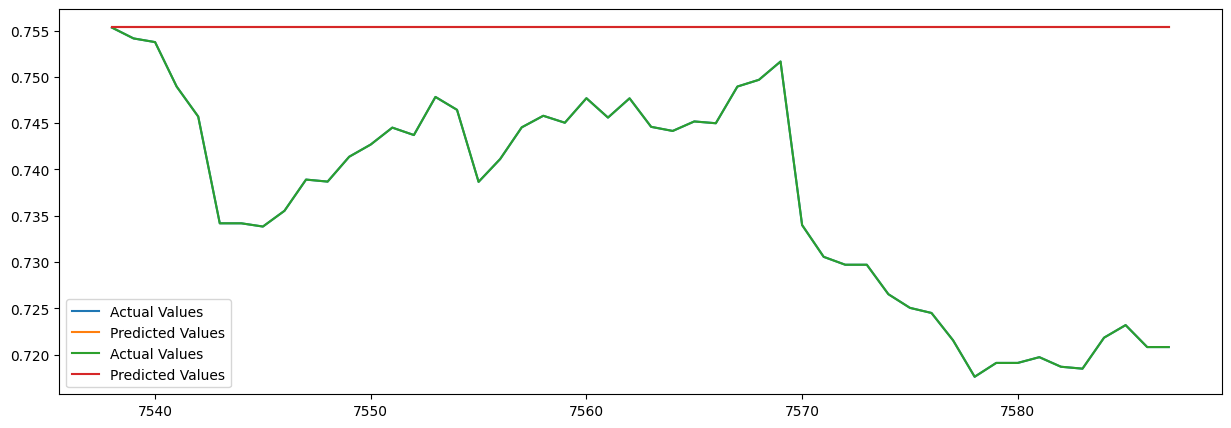

In [151]:
plt.plot(test.index, test['Ex_rate'], label = 'Actual Values')
plt.plot(test.index, y_pred_es, label = 'Predicted Values')
plt.legend()
plt.show()

In [153]:
print(mean_squared_error(test['Ex_rate'], y_pred_es))

0.000472288066363927


In [ ]:
Exponential Smoothing vs ARIMA compar:- 

   1) Exponential Smoothing: Smoothing-based forecasting technique.

      ARIMA: Statistical model based on autoregression and moving average.

   2) Trend & Seasonality Handling

      Exponential Smoothing: Basic version doesn’t handle, but Holt & Holt-Winters versions do.

      ARIMA: Can handle trend and seasonality (with SARIMA extension).

   3) Stationarity Requirement

      Exponential Smoothing: Works fine on non-stationary data.

      ARIMA: Requires stationary data (need to difference if not).

   4) Complexity

      Exponential Smoothing: Simple and easy to implement.

     ARIMA: Complex, needs parameter tuning (p, d, q).

   5) Parameters

      Exponential Smoothing: Uses smoothing constants like α (alpha), β (beta), γ (gamma).

      ARIMA: Uses p (autoregressive), d (differencing), q (moving average).

   6)  Use Case

      Exponential Smoothing: Best for short-term, quick forecasting.

      ARIMA: Better for long-term, detailed and complex forecasting.

